# Estación Barrio del Pilar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_39.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,54.322581
2013-02-01,38.870968
2013-03-01,33.451613
2013-04-01,28.935484
2013-05-01,27.483871


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

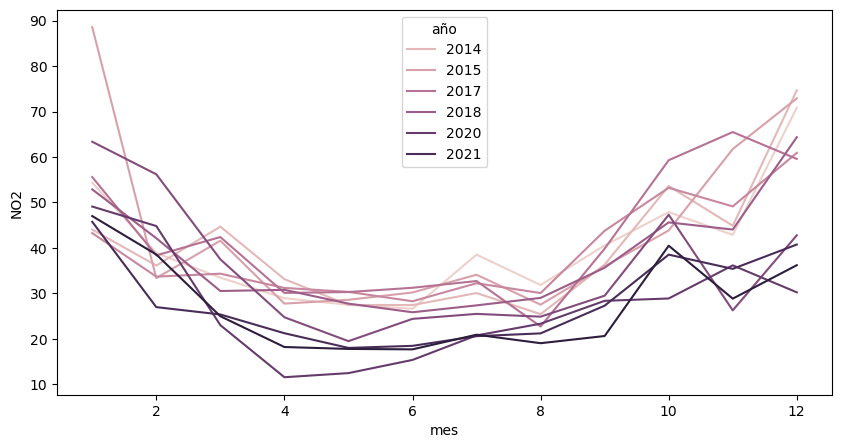

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

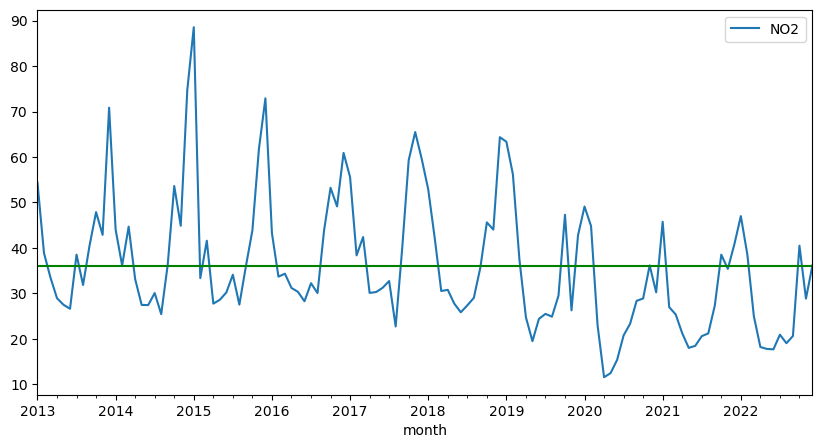

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

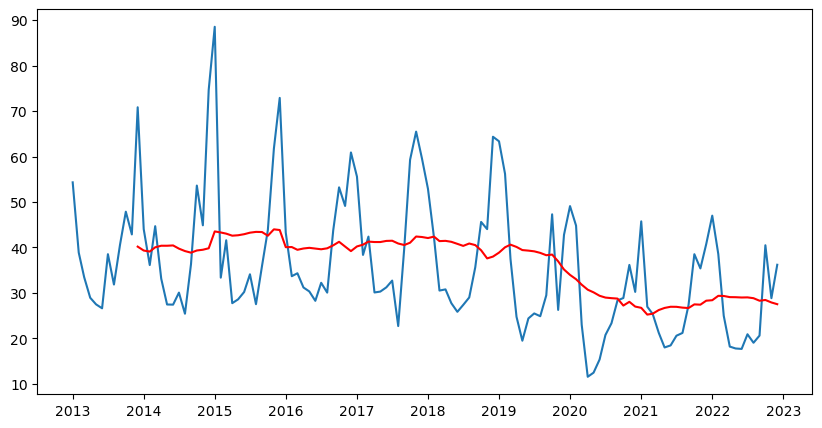

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,54.322581
2013-02-01,38.870968
2013-03-01,33.451613
2013-04-01,28.935484
2013-05-01,27.483871


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,54.322581,2013,1
2013-02-01,38.870968,2013,2
2013-03-01,33.451613,2013,3
2013-04-01,28.935484,2013,4
2013-05-01,27.483871,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,54.322581,2013,1
2013-02-01,38.870968,2013,2
2013-03-01,33.451613,2013,3
2013-04-01,28.935484,2013,4
2013-05-01,27.483871,2013,5


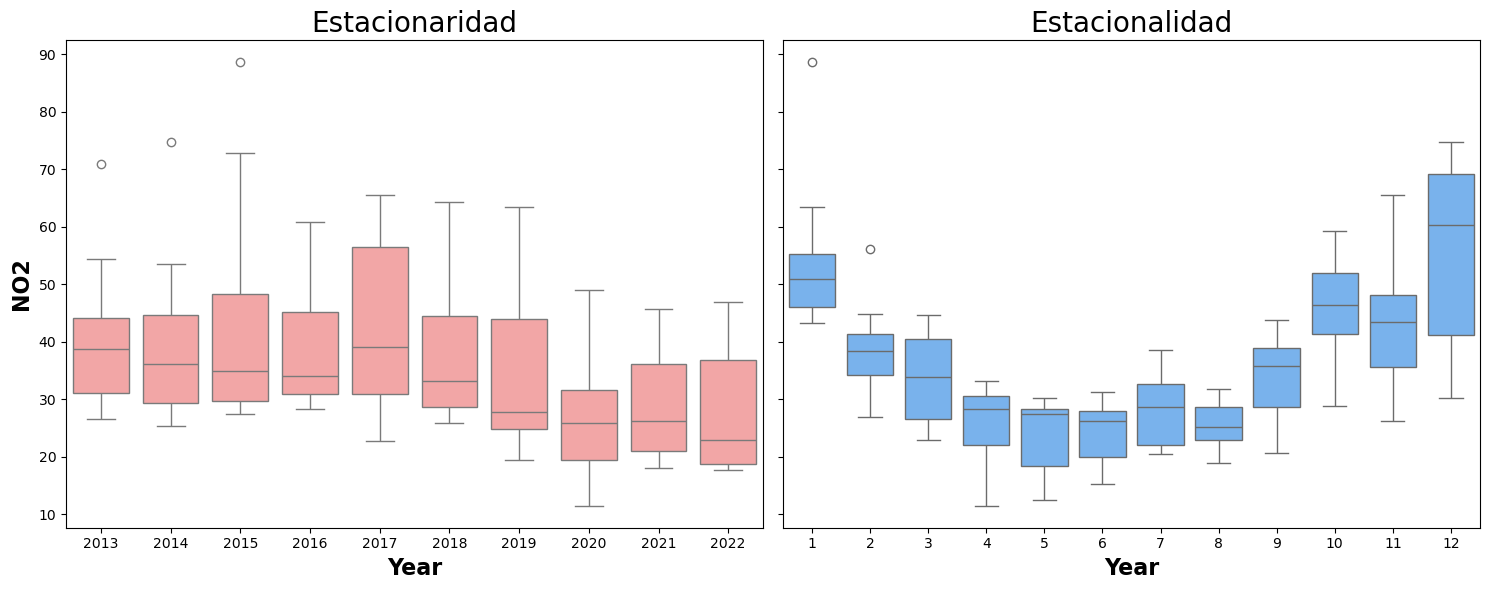

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.3832947826448454,
 0.9128508093624141,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 765.3345973304749)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.3832947826448454
p-value 0.9128508093624141
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999999
1 mes Lag, 0.6619420552746699
2 mes Lag, 0.3951815551985782
3 mes Lag, 0.15066023812342097
4 mes Lag, -0.13998044660063594
5 mes Lag, -0.2841007546926138
6 mes Lag, -0.3204913440337886
7 mes Lag, -0.31398251222776596
8 mes Lag, -0.169280024727
9 mes Lag, 0.11104105748649794
10 mes Lag, 0.3837293609284975
11 mes Lag, 0.6119581576275491
12 mes Lag, 0.7556480767991504
13 mes Lag, 0.6417643411595875
14 mes Lag, 0.37735779923252416
15 mes Lag, 0.1504308694038761
16 mes Lag, -0.1616680595149228
17 mes Lag, -0.32781354820779446
18 mes Lag, -0.3656356039293035
19 mes Lag, -0.3538567433532531
20 mes Lag, -0.2063811556403026
21 mes Lag, 0.07541511758670816
22 mes Lag, 0.2808506184835354
23 mes Lag, 0.5715224641810478
24 mes Lag, 0.7322371102167641
25 mes Lag, 0.5562277839761324
26 mes Lag, 0.34591965432838956
27 mes Lag, 0.09180909007564751
28 mes Lag, -0.21112748375711426
29 mes Lag, -0.408009069935323
30 mes Lag, -0.4915364924664793
31 mes Lag, -0.4585486567028792

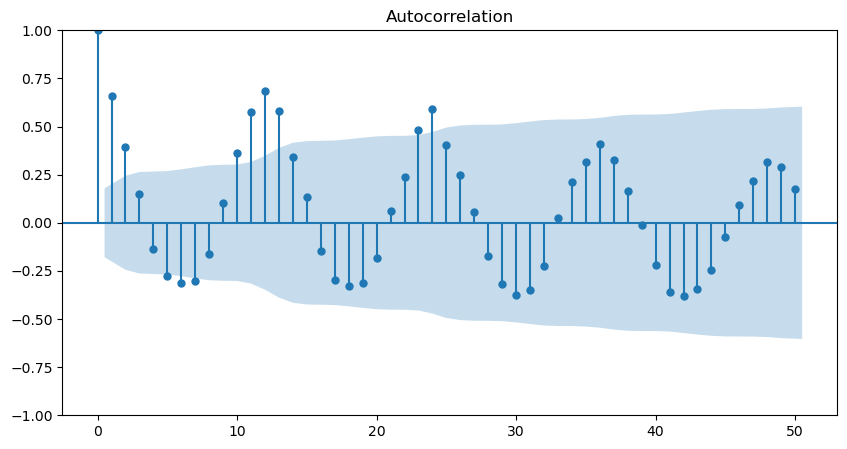

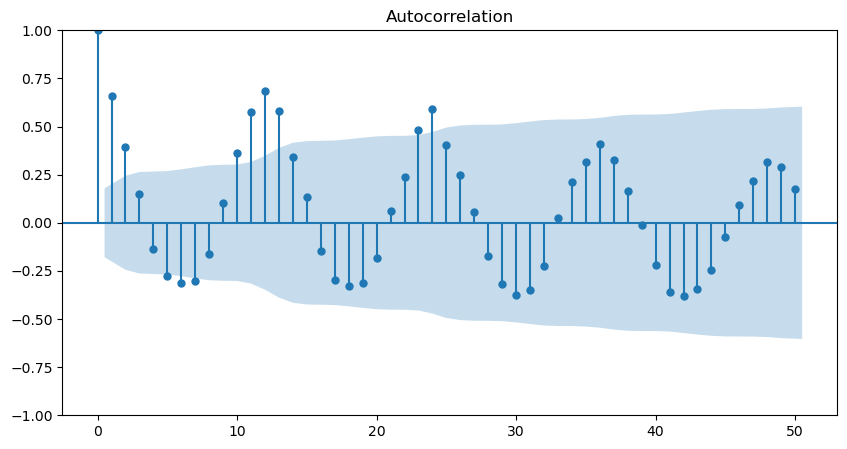

In [19]:
plot_acf(df, lags = 50)

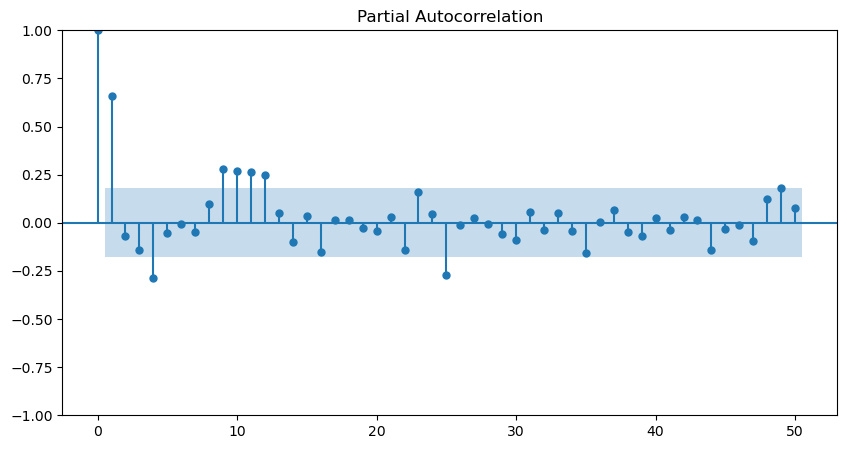

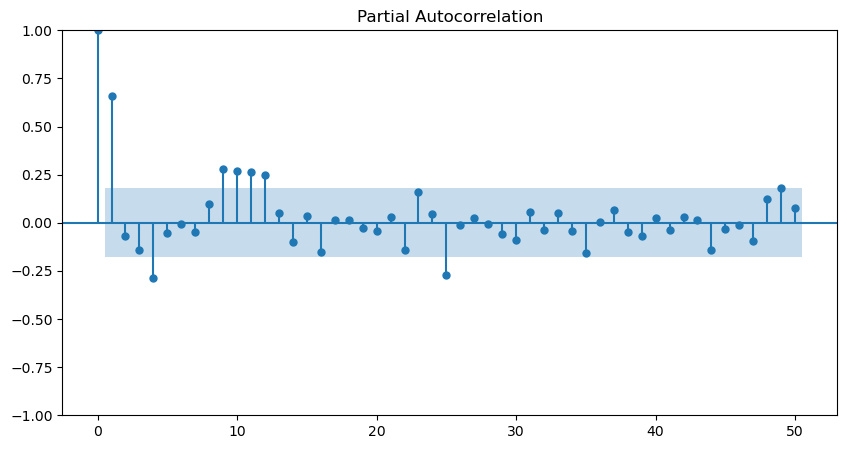

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,54.322581
2013-02-01,38.870968
2013-03-01,33.451613
2013-04-01,28.935484
2013-05-01,27.483871


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 58%|█████▊    | 14/24 [00:00<00:00, 26.05it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 328 ms
Wall time: 1.28 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
7,13.025489,"(1, 1, 1)"
14,13.160022,"(2, 1, 2)"
8,13.238986,"(1, 1, 2)"
20,13.355333,"(3, 1, 2)"
2,15.053351,"(0, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(1, 1, 1),  # modelo arima
               seasonal_order=(1, 1, 1, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

Error mae:  7.936602678312791
CPU times: total: 62.5 ms
Wall time: 98.5 ms


C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,real,pred,error
2020-07-01,20.741935,24.562928,3.820992
2020-08-01,23.322581,25.465084,2.142504
2020-09-01,28.354839,34.638044,6.283206
2020-10-01,28.870968,48.839021,19.968053
2020-11-01,36.161290,42.943103,6.781813
2020-12-01,30.225806,57.086497,26.860690
2021-01-01,45.741935,56.342969,10.601034
2021-02-01,26.967742,48.186931,21.219189
2021-03-01,25.354839,32.199440,6.844602
2021-04-01,21.225806,22.317936,1.092129


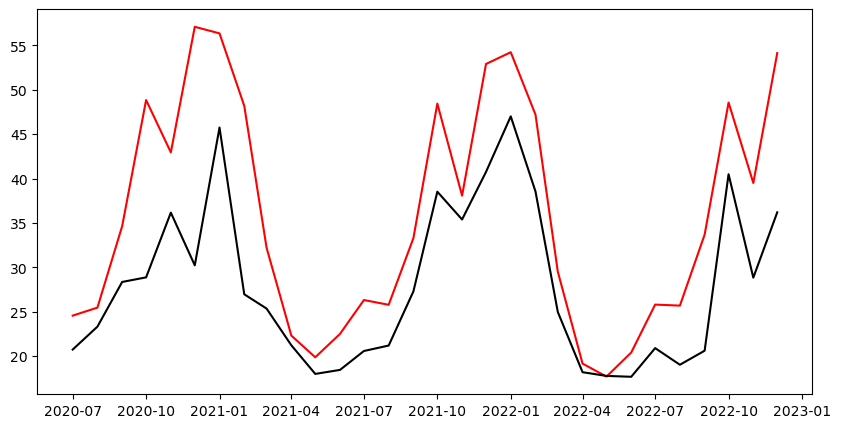

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,54.842748
2023-02-01,47.486866
2023-03-01,30.293245
2023-04-01,20.086277
2023-05-01,18.334094
2023-06-01,21.023656
2023-07-01,25.955868
2023-08-01,25.716347
2023-09-01,33.568684
2023-10-01,48.521536


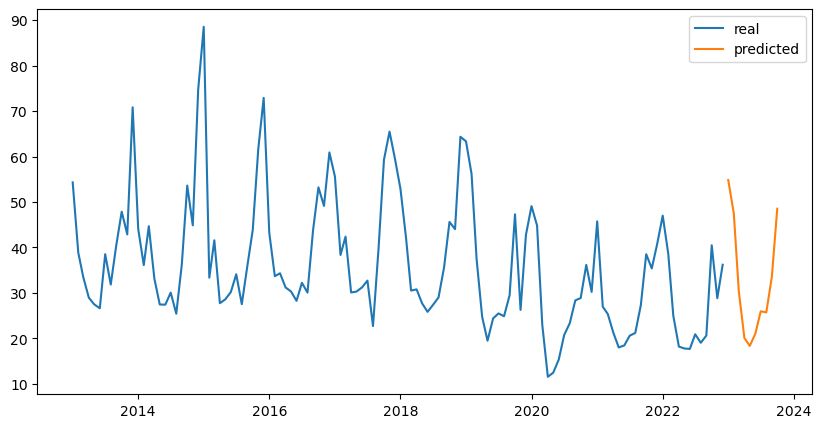

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,54.842748
2023-02-01,47.486866
2023-03-01,30.293245
2023-04-01,20.086277
2023-05-01,18.334094
2023-06-01,21.023656
2023-07-01,25.955868
2023-08-01,25.716347
2023-09-01,33.568684
2023-10-01,48.521536


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [37]:
real = df23[df23["ESTACION"] == 39]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
108,108,39,2023,1,36.419355
109,109,39,2023,2,35.258065
110,110,39,2023,3,24.161290
111,111,39,2023,4,21.838710
112,112,39,2023,5,15.129032
113,113,39,2023,6,19.064516
114,114,39,2023,7,20.774194
115,115,39,2023,8,19.032258
116,116,39,2023,9,30.096774
117,117,39,2023,10,32.935484


In [38]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [39]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,108,36.419355
2023-02-01,109,35.258065
2023-03-01,110,24.161290
2023-04-01,111,21.838710
2023-05-01,112,15.129032
2023-06-01,113,19.064516
2023-07-01,114,20.774194
2023-08-01,115,19.032258
2023-09-01,116,30.096774


In [40]:
real.drop("Unnamed: 0", axis=1, inplace=True)

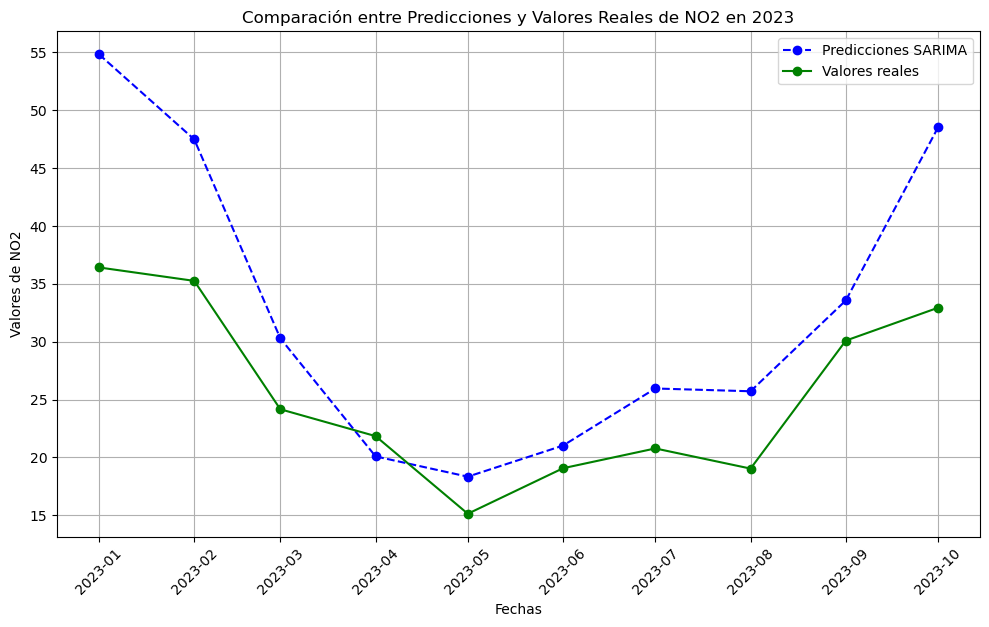

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [42]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    36.419355
2023-02-01    35.258065
2023-03-01    24.161290
2023-04-01    21.838710
2023-05-01    15.129032
2023-06-01    19.064516
2023-07-01    20.774194
2023-08-01    19.032258
2023-09-01    30.096774
2023-10-01    32.935484
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [43]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,54.842748
2023-02-01,47.486866
2023-03-01,30.293245
2023-04-01,20.086277
2023-05-01,18.334094
2023-06-01,21.023656
2023-07-01,25.955868
2023-08-01,25.716347
2023-09-01,33.568684
2023-10-01,48.521536


In [44]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,36.419355
2023-02-01,35.258065
2023-03-01,24.161290
2023-04-01,21.838710
2023-05-01,15.129032
2023-06-01,19.064516
2023-07-01,20.774194
2023-08-01,19.032258
2023-09-01,30.096774
2023-10-01,32.935484


In [45]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    28.962786
dtype: float64